In [1]:
%matplotlib ipympl

import pandas
from common import write_dicts_to_csv
from generate_matchups import calculate_matchups
import matplotlib.pyplot as plt
import os
import json

weapons_location = "../src/weapons/"

weapons = []
weapons_files = os.listdir(weapons_location)
for weapon_file in weapons_files:
    if weapon_file[-5:] != ".json":
        continue

    with open(weapons_location + weapon_file, "r") as f:
        loaded = json.load(f)
        if "id" not in loaded:
            continue
            
        weapons.append(loaded)

In [2]:
matchups = calculate_matchups(weapons)
pandas.DataFrame(matchups)


,name,Katars,Dagger,Warhammer,One Handed Spear,Heavy Cavalry Sword,Maul,Dane Axe,Messer,Spear,...,Hatchet,Rapier,Glaive,Halberd,Sword,Throwing Mallet,winning_matchups,losing_matchups,tied_matchups,average_matchup
0,Polehammer,9.00,10.00,6.75,3.00,6.75,7.50,9.75,3.00,2.00,...,12.00,8.50,-1.00,-0.75,11.00,11.50,36,2,1,7.724359
1,Greatsword,9.00,10.00,7.25,2.00,2.50,6.50,8.00,2.75,-0.75,...,12.00,9.50,-1.75,-2.75,12.00,11.50,34,4,1,7.102564
2,Halberd,9.50,10.50,3.50,7.50,6.50,5.50,2.50,2.00,2.00,...,8.50,10.00,-1.00,0.00,10.50,9.00,37,1,1,5.878205
3,Messer,6.00,8.00,7.25,-2.00,2.25,6.75,6.25,0.00,-2.00,...,12.00,7.50,-4.75,-2.00,8.00,9.50,29,8,2,5.352564
4,War Club,4.50,7.75,5.25,2.75,8.25,6.50,4.00,2.25,-0.75,...,9.50,7.25,1.00,-3.75,6.25,8.25,33,5,1,5.224359
5,Highland Sword,7.00,7.00,6.00,3.25,4.25,5.50,5.50,0.25,-2.00,...,11.00,3.50,-2.50,-4.00,5.00,8.50,33,5,1,4.782051
6,Heavy Mace,9.00,9.75,4.50,-1.75,0.75,5.50,7.50,-1.75,-0.75,...,11.50,0.75,-2.00,-0.25,4.25,11.25,27,10,2,4.371795
7,Two Handed Hammer,7.50,8.00,6.50,-3.00,1.75,4.50,9.25,-1.75,-1.50,...,11.75,1.50,-1.25,-2.25,4.00,10.50,26,11,2,3.910256
8,Longsword,9.25,10.00,5.00,0.50,-1.50,7.50,5.50,-5.50,1.00,...,8.00,9.50,1.25,-6.50,5.00,9.50,27,10,2,3.615385
9,Glaive,4.75,5.50,5.00,6.50,4.25,5.75,1.50,4.75,-0.25,...,3.75,5.00,0.00,1.00,0.00,2.25,33,4,2,3.320513


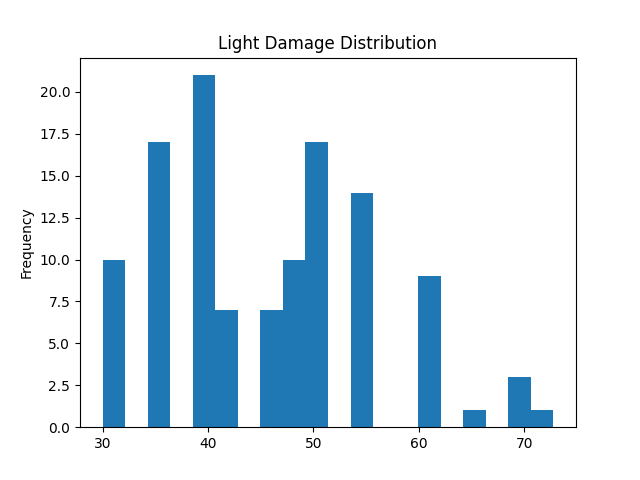

In [3]:
import matplotlib.pyplot as plt

damages = list(map(lambda w: w["attacks"]["slash"]["light"]["damage"], weapons))
damages.extend(list(map(lambda w: w["attacks"]["overhead"]["light"]["damage"], weapons)))
damages.extend(list(map(lambda w: w["attacks"]["stab"]["light"]["damage"], weapons)))

plt.hist(damages, bins=20)
plt.gca().set(title='Light Damage Distribution', ylabel='Frequency');

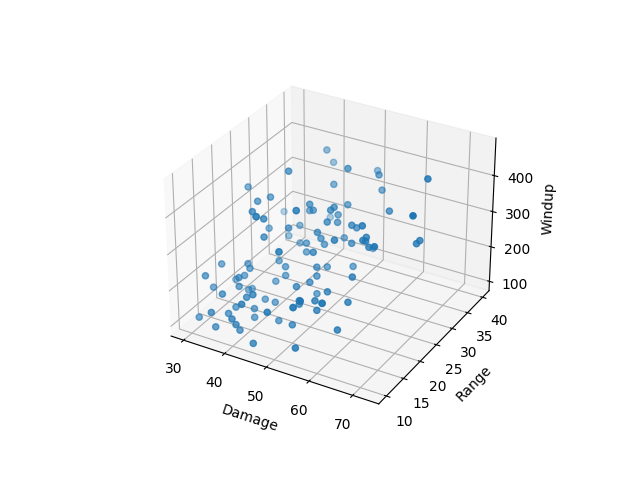

In [4]:
import matplotlib.pyplot as plt

damages = list(map(lambda w: w["attacks"]["slash"]["light"]["damage"], weapons))
ranges = list(map(lambda w: w["attacks"]["slash"]["range"], weapons))
windups = list(map(lambda w: w["attacks"]["slash"]["light"]["windup"], weapons))

damages.extend(list(map(lambda w: w["attacks"]["overhead"]["light"]["damage"], weapons)))
ranges.extend(list(map(lambda w: w["attacks"]["overhead"]["range"], weapons)))
windups.extend(list(map(lambda w: w["attacks"]["overhead"]["light"]["windup"], weapons)))

damages.extend(list(map(lambda w: w["attacks"]["stab"]["light"]["damage"], weapons)))
ranges.extend(list(map(lambda w: w["attacks"]["stab"]["range"], weapons)))
windups.extend(list(map(lambda w: w["attacks"]["stab"]["light"]["windup"], weapons)))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Damage')
ax.set_ylabel('Range')
ax.set_zlabel('Windup')

ax.scatter(damages, ranges, windups)
